İlişki türleri analizi görselleştirmeleri oluşturuluyor...


/tmp/ipykernel_1002560/974386393.py:101: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(df['relation_type'], rotation=45, ha='right')
/tmp/ipykernel_1002560/974386393.py:120: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(df['relation_type'], rotation=45, ha='right')


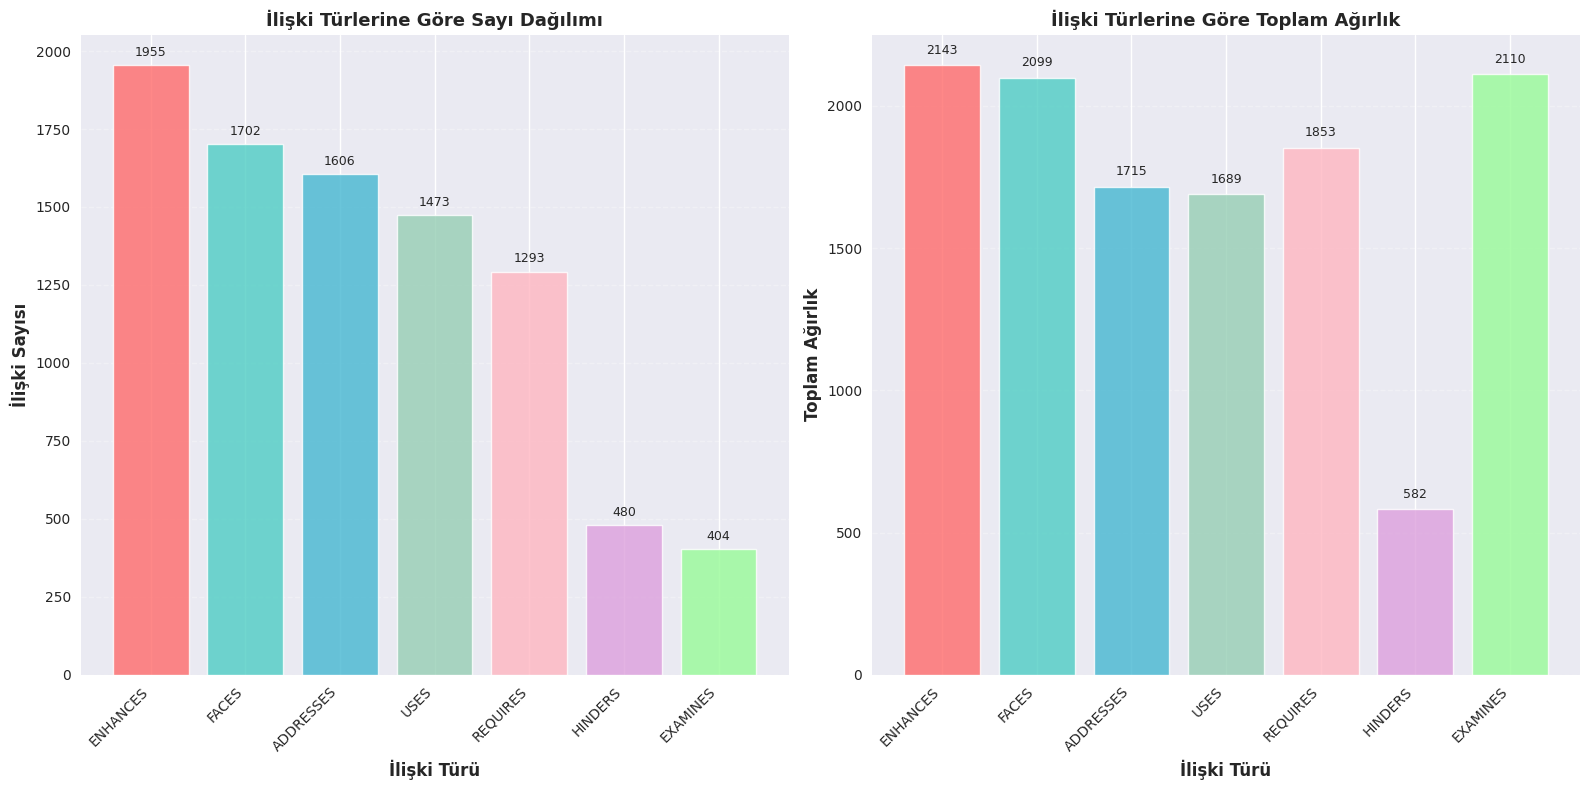

✓ Şekil 5.4.1 oluşturuldu


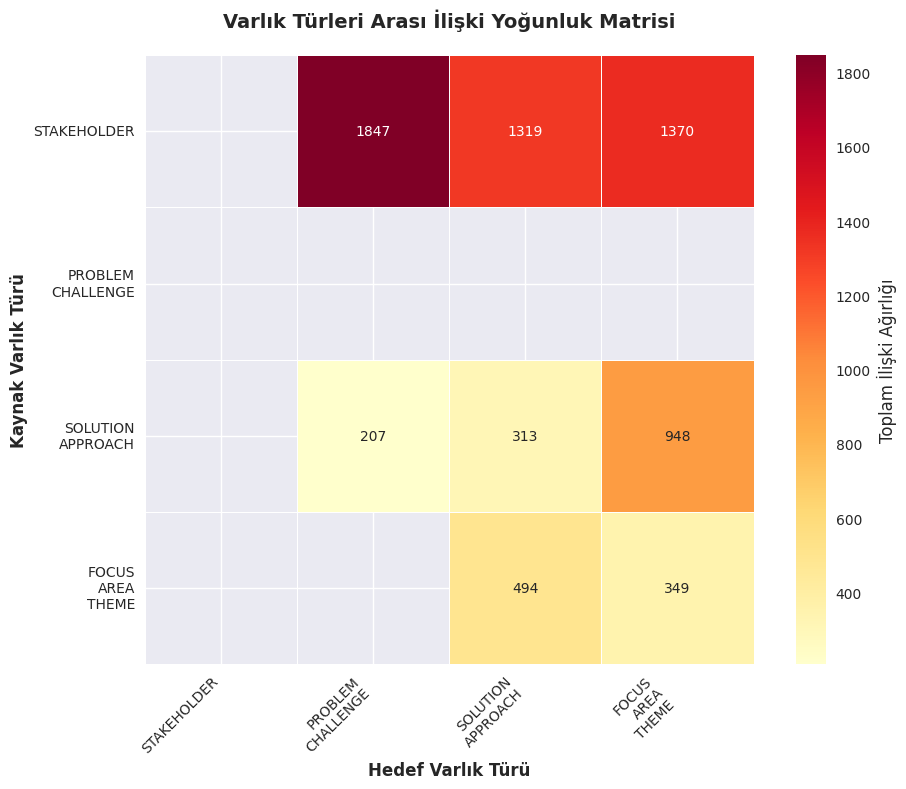

✓ Şekil 5.4.2 oluşturuldu


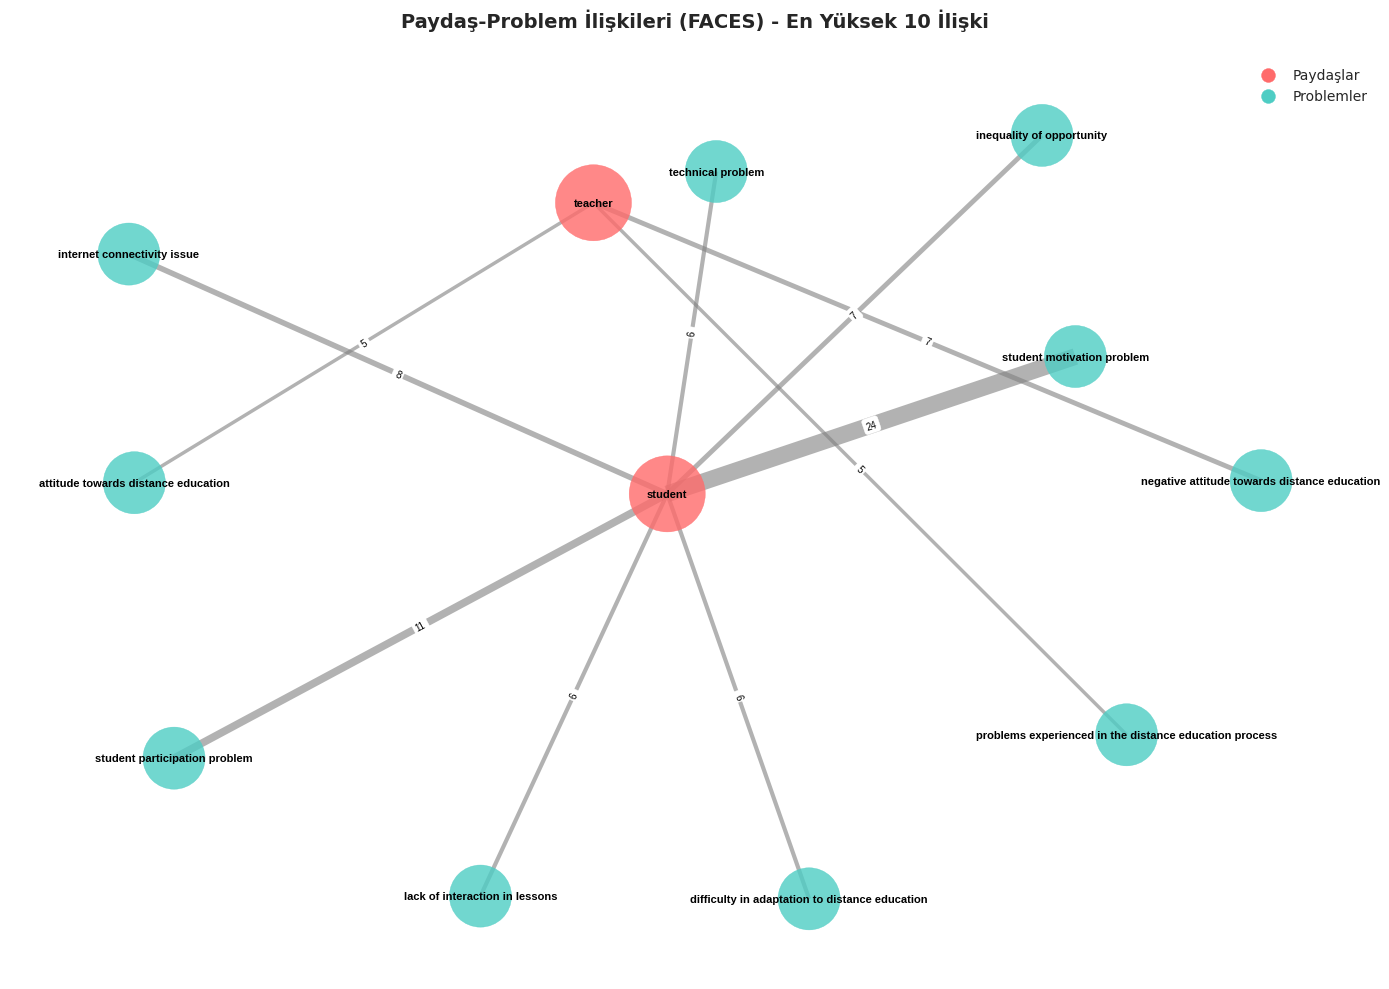

✓ Şekil 5.4.3 oluşturuldu


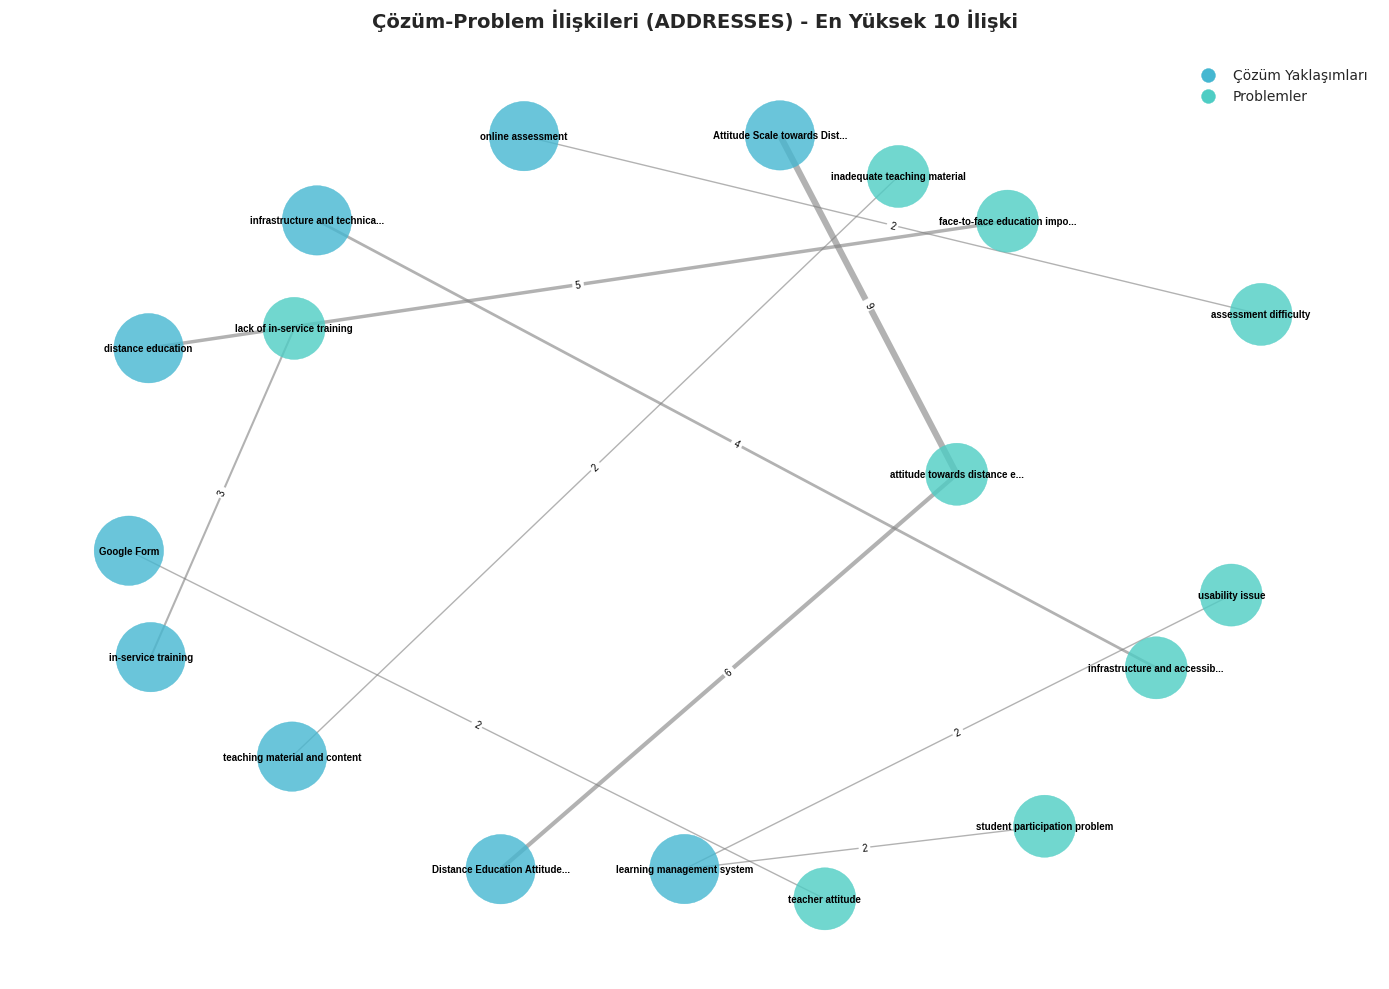

✓ Şekil 5.4.4 oluşturuldu


/tmp/ipykernel_1002560/974386393.py:340: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = plt.boxplot(distributions,


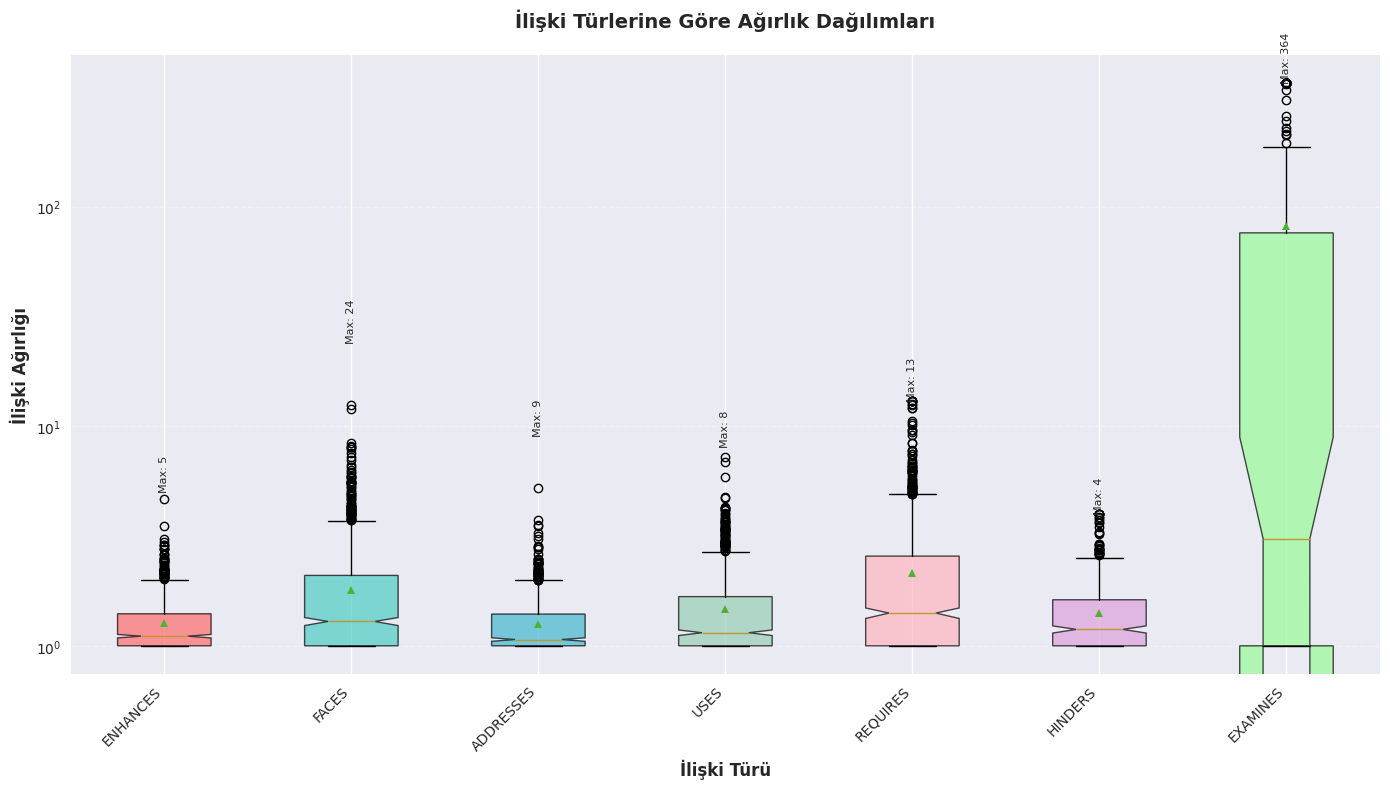

✓ Şekil 5.4.5 oluşturuldu
Tüm görselleştirmeler tamamlandı!


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import networkx as nx
from matplotlib.patches import Rectangle

# Tema ayarları
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

# Hardcode edilmiş veriler

# 1. Genel ilişki türleri istatistikleri
relation_stats = [
    {"relation_type": "ENHANCES", "count": 1955, "total_weight": 2143, "avg_weight": 1.096, "min_weight": 1, "max_weight": 5, "stdev_weight": 0.413},
    {"relation_type": "FACES", "count": 1702, "total_weight": 2099, "avg_weight": 1.233, "min_weight": 1, "max_weight": 24, "stdev_weight": 0.894},
    {"relation_type": "ADDRESSES", "count": 1606, "total_weight": 1715, "avg_weight": 1.068, "min_weight": 1, "max_weight": 9, "stdev_weight": 0.431},
    {"relation_type": "USES", "count": 1473, "total_weight": 1689, "avg_weight": 1.147, "min_weight": 1, "max_weight": 8, "stdev_weight": 0.651},
    {"relation_type": "REQUIRES", "count": 1293, "total_weight": 1853, "avg_weight": 1.433, "min_weight": 1, "max_weight": 13, "stdev_weight": 1.302},
    {"relation_type": "HINDERS", "count": 480, "total_weight": 582, "avg_weight": 1.213, "min_weight": 1, "max_weight": 4, "stdev_weight": 0.586},
    {"relation_type": "EXAMINES", "count": 404, "total_weight": 2110, "avg_weight": 5.223, "min_weight": 1, "max_weight": 364, "stdev_weight": 25.930}
]

# 2. Varlık türleri arası ilişki matrisi
entity_relation_matrix = [
    {"source_type": "STAKEHOLDER", "target_type": "PROBLEM_CHALLENGE", "frequency": 1488, "total_weight": 1847, "relation_type": "FACES"},
    {"source_type": "SOLUTION_APPROACH", "target_type": "PROBLEM_CHALLENGE", "frequency": 1218, "total_weight": 1280, "relation_type": "ADDRESSES"},
    {"source_type": "STAKEHOLDER", "target_type": "SOLUTION_APPROACH", "frequency": 1172, "total_weight": 1319, "relation_type": "USES"},
    {"source_type": "SOLUTION_APPROACH", "target_type": "FOCUS_AREA_THEME", "frequency": 884, "total_weight": 948, "relation_type": "ENHANCES"},
    {"source_type": "SOLUTION_APPROACH", "target_type": "SOLUTION_APPROACH", "frequency": 391, "total_weight": 521, "relation_type": "REQUIRES"},
    {"source_type": "FOCUS_AREA_THEME", "target_type": "SOLUTION_APPROACH", "frequency": 365, "total_weight": 494, "relation_type": "REQUIRES"},
    {"source_type": "STAKEHOLDER", "target_type": "FOCUS_AREA_THEME", "frequency": 320, "total_weight": 1370, "relation_type": "EXAMINES"},
    {"source_type": "FOCUS_AREA_THEME", "target_type": "FOCUS_AREA_THEME", "frequency": 303, "total_weight": 349, "relation_type": "ENHANCES"},
    {"source_type": "SOLUTION_APPROACH", "target_type": "SOLUTION_APPROACH", "frequency": 280, "total_weight": 313, "relation_type": "ENHANCES"},
    {"source_type": "SOLUTION_APPROACH", "target_type": "PROBLEM_CHALLENGE", "frequency": 198, "total_weight": 207, "relation_type": "ENHANCES"}
]

# 3. Paydaş-problem ilişkileri (FACES)
stakeholder_problem_data = [
    {"stakeholder": "student", "problem": "student motivation problem", "frequency": 24},
    {"stakeholder": "student", "problem": "student participation problem", "frequency": 11},
    {"stakeholder": "student", "problem": "internet connectivity issue", "frequency": 8},
    {"stakeholder": "student", "problem": "inequality of opportunity", "frequency": 7},
    {"stakeholder": "teacher", "problem": "negative attitude towards distance education", "frequency": 7},
    {"stakeholder": "student", "problem": "lack of interaction in lessons", "frequency": 6},
    {"stakeholder": "student", "problem": "technical problem", "frequency": 6},
    {"stakeholder": "student", "problem": "difficulty in adaptation to distance education", "frequency": 6},
    {"stakeholder": "teacher", "problem": "problems experienced in the distance education process", "frequency": 5},
    {"stakeholder": "teacher", "problem": "attitude towards distance education", "frequency": 5},
    {"stakeholder": "student", "problem": "lack of motivation", "frequency": 5},
    {"stakeholder": "student", "problem": "lack of internet infrastructure", "frequency": 5},
    {"stakeholder": "teacher", "problem": "inequality of opportunity", "frequency": 5},
    {"stakeholder": "student", "problem": "student feeling of isolation", "frequency": 4},
    {"stakeholder": "student", "problem": "self-regulation problem", "frequency": 4}
]

# 4. Çözüm-problem ilişkileri (ADDRESSES)
solution_problem_data = [
    {"solution": "Attitude Scale towards Distance Education", "problem": "attitude towards distance education", "frequency": 9},
    {"solution": "Distance Education Attitude Scale", "problem": "attitude towards distance education", "frequency": 6},
    {"solution": "distance education", "problem": "face-to-face education impossibility", "frequency": 5},
    {"solution": "infrastructure and technical support", "problem": "infrastructure and accessibility problem", "frequency": 4},
    {"solution": "in-service training", "problem": "lack of in-service training", "frequency": 3},
    {"solution": "learning management system", "problem": "student participation problem", "frequency": 2},
    {"solution": "teaching material and content", "problem": "inadequate teaching material", "frequency": 2},
    {"solution": "Google Form", "problem": "teacher attitude", "frequency": 2},
    {"solution": "learning management system", "problem": "usability issue", "frequency": 2},
    {"solution": "online assessment", "problem": "assessment difficulty", "frequency": 2},
    {"solution": "support service implementation", "problem": "inequality of opportunity", "frequency": 2},
    {"solution": "synchronous learning system", "problem": "inefficient education", "frequency": 2},
    {"solution": "in-service training program", "problem": "lack of in-service training", "frequency": 2},
    {"solution": "gamification intervention", "problem": "student motivation problem", "frequency": 2},
    {"solution": "distance education technology", "problem": "systemic problem", "frequency": 2}
]

# 1. Şekil 5.4.1: İlişki Türleri Dağılımı
def create_relation_types_distribution():
    # Topluluklar arası ilişkileri hariç tut (çok yüksek değerler var)
    df = pd.DataFrame([r for r in relation_stats if r['relation_type'] not in ['INTER_COMMUNITY', 'CONNECTED']])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    
    # Sol grafik: İlişki sayıları
    bars1 = ax1.bar(df['relation_type'], df['count'], 
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFB6C1', '#DDA0DD', '#98FB98'],
                    alpha=0.8, edgecolor='white', linewidth=1)
    
    ax1.set_xlabel('İlişki Türü', fontsize=12, fontweight='bold')
    ax1.set_ylabel('İlişki Sayısı', fontsize=12, fontweight='bold')
    ax1.set_title('İlişki Türlerine Göre Sayı Dağılımı', fontsize=13, fontweight='bold')
    ax1.grid(axis='y', alpha=0.3, linestyle='--')
    
    # X ekseni etiketlerini döndür
    ax1.set_xticklabels(df['relation_type'], rotation=45, ha='right')
    
    # Değer etiketleri
    for bar in bars1:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    # Sağ grafik: Toplam ağırlıklar
    bars2 = ax2.bar(df['relation_type'], df['total_weight'],
                    color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFB6C1', '#DDA0DD', '#98FB98'],
                    alpha=0.8, edgecolor='white', linewidth=1)
    
    ax2.set_xlabel('İlişki Türü', fontsize=12, fontweight='bold')
    ax2.set_ylabel('Toplam Ağırlık', fontsize=12, fontweight='bold')
    ax2.set_title('İlişki Türlerine Göre Toplam Ağırlık', fontsize=13, fontweight='bold')
    ax2.grid(axis='y', alpha=0.3, linestyle='--')
    
    # X ekseni etiketlerini döndür
    ax2.set_xticklabels(df['relation_type'], rotation=45, ha='right')
    
    # Değer etiketleri
    for bar in bars2:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height + 30,
                f'{int(height)}', ha='center', va='bottom', fontsize=9)
    
    plt.tight_layout()
    plt.savefig('Şekil_5_4_1_İlişki_Türleri_Dağılımı.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 2. Şekil 5.4.2: Varlık Türleri Arası İlişki Matrisi
def create_entity_relation_matrix():
    # Matrisi oluştur
    entity_types = ['STAKEHOLDER', 'PROBLEM_CHALLENGE', 'SOLUTION_APPROACH', 'FOCUS_AREA_THEME']
    matrix = np.zeros((len(entity_types), len(entity_types)))
    
    # Veriyi matrise dönüştür
    for item in entity_relation_matrix:
        source_idx = entity_types.index(item['source_type'])
        target_idx = entity_types.index(item['target_type'])
        matrix[source_idx][target_idx] = item['total_weight']
    
    plt.figure(figsize=(10, 8))
    
    # Isı haritası oluştur
    mask = matrix == 0  # Sıfır değerleri maskele
    sns.heatmap(matrix, 
                xticklabels=[t.replace('_', '\n') for t in entity_types],
                yticklabels=[t.replace('_', '\n') for t in entity_types],
                annot=True, 
                fmt='.0f',
                cmap='YlOrRd',
                cbar_kws={'label': 'Toplam İlişki Ağırlığı'},
                mask=mask,
                square=True,
                linewidths=0.5)
    
    plt.xlabel('Hedef Varlık Türü', fontsize=12, fontweight='bold')
    plt.ylabel('Kaynak Varlık Türü', fontsize=12, fontweight='bold')
    plt.title('Varlık Türleri Arası İlişki Yoğunluk Matrisi', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Eğik etiketler
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.savefig('Şekil_5_4_2_Varlık_Türleri_Arası_İlişki_Matrisi.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 3. Şekil 5.4.3: Paydaş-Problem İlişkileri
def create_stakeholder_problem_network():
    # NetworkX ağı oluştur
    G = nx.Graph()
    
    # Top 10 ilişki
    top_data = stakeholder_problem_data[:10]
    
    # Düğümleri ekle
    stakeholders = set()
    problems = set()
    
    for item in top_data:
        stakeholders.add(item['stakeholder'])
        problems.add(item['problem'])
        G.add_edge(item['stakeholder'], item['problem'], weight=item['frequency'])
    
    plt.figure(figsize=(14, 10))
    
    # Layout
    pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
    
    # Düğüm renkleri
    node_colors = []
    node_sizes = []
    for node in G.nodes():
        if node in stakeholders:
            node_colors.append('#FF6B6B')  # Paydaşlar kırmızı
            node_sizes.append(3000)
        else:
            node_colors.append('#4ECDC4')  # Problemler teal
            node_sizes.append(2000)
    
    # Kenar kalınlıkları
    edges = G.edges()
    edge_weights = [G[u][v]['weight'] for u, v in edges]
    
    # Ağı çiz
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in edge_weights], alpha=0.6, edge_color='gray')
    
    # Etiketler
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight='bold')
    
    # Kenar etiketleri (ağırlıklar)
    edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)
    
    plt.title('Paydaş-Problem İlişkileri (FACES) - En Yüksek 10 İlişki', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Legend
    legend_elements = [
        plt.scatter([], [], c='#FF6B6B', s=100, label='Paydaşlar'),
        plt.scatter([], [], c='#4ECDC4', s=100, label='Problemler')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('Şekil_5_4_3_Paydaş_Problem_İlişkileri.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 4. Şekil 5.4.4: Çözüm-Problem İlişkileri
def create_solution_problem_network():
    # NetworkX ağı oluştur
    G = nx.Graph()
    
    # Top 10 ilişki
    top_data = solution_problem_data[:10]
    
    # Düğümleri ekle
    solutions = set()
    problems = set()
    
    for item in top_data:
        solutions.add(item['solution'])
        problems.add(item['problem'])
        G.add_edge(item['solution'], item['problem'], weight=item['frequency'])
    
    plt.figure(figsize=(14, 10))
    
    # Layout
    pos = nx.spring_layout(G, k=3, iterations=50, seed=42)
    
    # Düğüm renkleri ve boyutları
    node_colors = []
    node_sizes = []
    for node in G.nodes():
        if node in solutions:
            node_colors.append('#45B7D1')  # Çözümler mavi
            node_sizes.append(2500)
        else:
            node_colors.append('#4ECDC4')  # Problemler teal
            node_sizes.append(2000)
    
    # Kenar kalınlıkları
    edges = G.edges()
    edge_weights = [G[u][v]['weight'] for u, v in edges]
    
    # Ağı çiz
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=node_sizes, alpha=0.8)
    nx.draw_networkx_edges(G, pos, width=[w*0.5 for w in edge_weights], alpha=0.6, edge_color='gray')
    
    # Etiketler (kısalt eğer çok uzunsa)
    labels = {}
    for node in G.nodes():
        if len(node) > 30:
            labels[node] = node[:27] + '...'
        else:
            labels[node] = node
    
    nx.draw_networkx_labels(G, pos, labels, font_size=7, font_weight='bold')
    
    # Kenar etiketleri (ağırlıklar)
    edge_labels = {(u, v): str(d['weight']) for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=7)
    
    plt.title('Çözüm-Problem İlişkileri (ADDRESSES) - En Yüksek 10 İlişki', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Legend
    legend_elements = [
        plt.scatter([], [], c='#45B7D1', s=100, label='Çözüm Yaklaşımları'),
        plt.scatter([], [], c='#4ECDC4', s=100, label='Problemler')
    ]
    plt.legend(handles=legend_elements, loc='upper right')
    
    plt.axis('off')
    plt.tight_layout()
    plt.savefig('Şekil_5_4_4_Çözüm_Problem_İlişkileri.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# 5. Şekil 5.4.5: İlişki Ağırlık Dağılımları
def create_relation_weight_distributions():
    # İlişki türleri için simüle edilmiş ağırlık dağılımları oluştur
    np.random.seed(42)
    
    # Her ilişki türü için dağılım parametrelerini kullan
    distributions = []
    labels = []
    
    for rel in relation_stats:
        if rel['relation_type'] not in ['INTER_COMMUNITY', 'CONNECTED']:
            # Log-normal dağılım kullanarak gerçekçi dağılım oluştur
            mean = rel['avg_weight']
            std = rel['stdev_weight']
            size = min(rel['count'], 1000)  # Performans için sınırla
            
            # Parametreleri ayarla
            if mean > 1:
                data = np.random.lognormal(mean=np.log(mean), sigma=std/mean, size=size)
                data = np.clip(data, rel['min_weight'], rel['max_weight'])
            else:
                # Düşük ortalama için normal dağılım
                data = np.random.normal(loc=mean, scale=std, size=size)
                data = np.clip(data, rel['min_weight'], rel['max_weight'])
            
            distributions.append(data)
            labels.append(rel['relation_type'])
    
    plt.figure(figsize=(14, 8))
    
    # Box plot oluştur
    box_plot = plt.boxplot(distributions, 
                          labels=labels,
                          patch_artist=True,
                          notch=True,
                          showmeans=True)
    
    # Renkleri uygula
    colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFB6C1', '#DDA0DD', '#98FB98']
    for patch, color in zip(box_plot['boxes'], colors[:len(labels)]):
        patch.set_facecolor(color)
        patch.set_alpha(0.7)
    
    plt.xlabel('İlişki Türü', fontsize=12, fontweight='bold')
    plt.ylabel('İlişki Ağırlığı', fontsize=12, fontweight='bold')
    plt.title('İlişki Türlerine Göre Ağırlık Dağılımları', 
              fontsize=14, fontweight='bold', pad=20)
    
    # Y eksenini log scale yap
    plt.yscale('log')
    plt.grid(axis='y', alpha=0.3, linestyle='--')
    
    # X ekseni etiketlerini döndür
    plt.xticks(rotation=45, ha='right')
    
    # İstatistiksel bilgiler ekle
    for i, rel in enumerate([r for r in relation_stats if r['relation_type'] not in ['INTER_COMMUNITY', 'CONNECTED']]):
        plt.text(i+1, rel['max_weight'], f"Max: {rel['max_weight']}", 
                ha='center', va='bottom', fontsize=8, rotation=90)
    
    plt.tight_layout()
    plt.savefig('Şekil_5_4_5_İlişki_Ağırlık_Dağılımları.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# Tüm grafikları oluştur
if __name__ == "__main__":
    print("İlişki türleri analizi görselleştirmeleri oluşturuluyor...")
    
    create_relation_types_distribution()
    print("✓ Şekil 5.4.1 oluşturuldu")
    
    create_entity_relation_matrix()
    print("✓ Şekil 5.4.2 oluşturuldu")
    
    create_stakeholder_problem_network()
    print("✓ Şekil 5.4.3 oluşturuldu")
    
    create_solution_problem_network()
    print("✓ Şekil 5.4.4 oluşturuldu")
    
    create_relation_weight_distributions()
    print("✓ Şekil 5.4.5 oluşturuldu")
    
    print("Tüm görselleştirmeler tamamlandı!")